In [89]:
import json
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

In [41]:
# list_of_files = glob.glob('../data/*') # * means all if need specific format then *.csv
# latest_file = max(list_of_files, key=os.path.getctime)

In [141]:
plt.rcParams['figure.figsize'] = [20, 10]

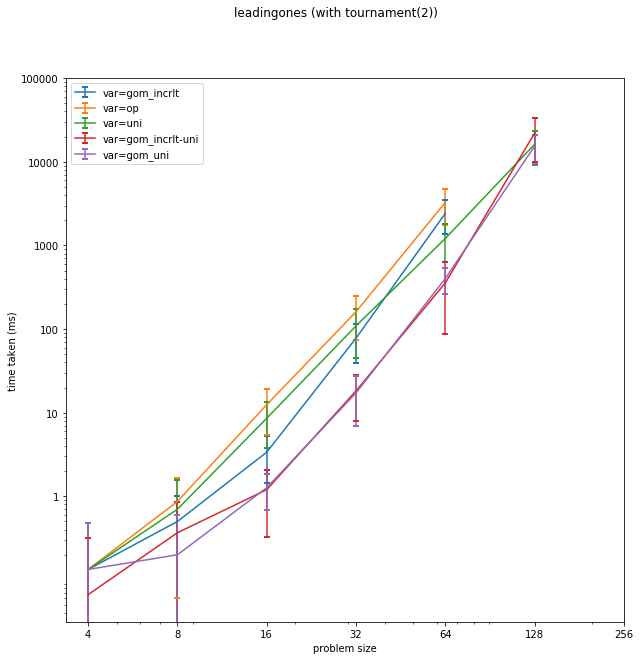

In [85]:
tournamentsize = 2
# problem = 'onemax'
problem = 'leadingones'

# filename = "../data/exp1/" + str(problem) + "_tour" + str(tournamentsize) + ".json"
# filename = "../data/exp1/191125_183904_rawdata.json"
filename = "../data/exp2/data_combined.json"


with open(filename) as json_file:
    data = json.load(json_file)
    
    fig = plt.figure()
    fig.suptitle(str(problem) + " (with tournament(" + str(tournamentsize) + "))")
    
    data1 = data['sel=tour' + str(tournamentsize)]
    
    for var in data1:
        data2 = data1[var]
        numEntries = len(data2)
        avgTimes = np.zeros(numEntries)
        stdTimes = np.zeros(numEntries)
        problemSizes = np.zeros(numEntries)

        for i, problemsize in enumerate(sorted(map(int, data2))):

            problemSizes[i] = problemsize

            repetitions = data2[str(problemsize)]
            times = np.empty(30)
            for j, rep in enumerate(repetitions):
                time = repetitions[rep]['timeTaken']
                times[j] = time

            avgTimes[i] = np.mean(times)
            stdTimes[i] = np.std(times)

        plt.errorbar(problemSizes, avgTimes, yerr=stdTimes, 
                     capsize=3, capthick=2, label=var)
    
    plt.legend()
    plt.xlabel('problem size')
    plt.ylabel('time taken (ms)')
    plt.xscale('log')
    plt.yscale('log')
    
    y = [10**x for x in range(6)]
    x = [2**x for x in range(2,9)]
    plt.yticks(y, y)
    plt.xticks(x, x)

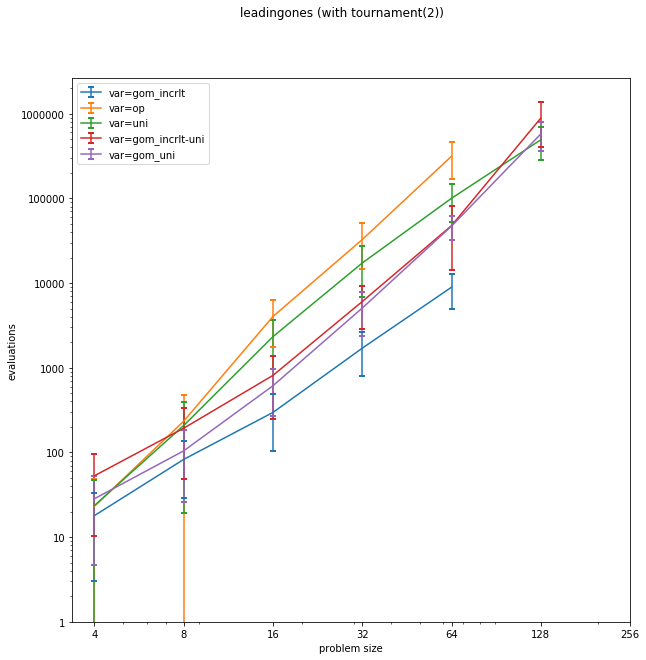

In [88]:
tournamentsize = 2
# problem = 'onemax'
problem = 'leadingones'

# filename = "../data/exp1/" + str(problem) + "_tour" + str(tournamentsize) + ".json"
# filename = "../data/exp1/191125_183904_rawdata.json"
# filename = "../data/exp1/191125_185805_rawdata.json"
filename = "../data/exp2/data_combined.json"

with open(filename) as json_file:
    data = json.load(json_file)
    
    fig = plt.figure()
    fig.suptitle(str(problem) + " (with tournament(" + str(tournamentsize) + "))")
    
    data1 = data['sel=tour' + str(tournamentsize)]
    
    for var in data1:
        data2 = data1[var]
        numEntries = len(data2)
        avgTimes = np.zeros(numEntries)
        stdTimes = np.zeros(numEntries)
        problemSizes = np.zeros(numEntries)

        for i, problemsize in enumerate(sorted(map(int, data2))):

            problemSizes[i] = problemsize

            repetitions = data2[str(problemsize)]
            times = np.empty(30)
            for j, rep in enumerate(repetitions):
                time = repetitions[rep]['evaluations']
                times[j] = time

            avgTimes[i] = np.mean(times)
            stdTimes[i] = np.std(times)

        plt.errorbar(problemSizes, avgTimes, yerr=stdTimes, 
                     capsize=3, capthick=2, label=var)
    
    plt.legend()
    plt.xlabel('problem size')
    plt.ylabel('evaluations')
    plt.xscale('log')
    plt.yscale('log')
    
    y = [10**x for x in range(7)]
    x = [2**x for x in range(2,9)]
    plt.yticks(y, y)
    plt.xticks(x, x)

In [87]:
from jsonmerge import merge
import json

def mergeJSON(json_1_file_loc, json_2_file_loc, result_file_loc):
    with open(json_1_file_loc) as json_file:
        json1 = json.load(json_file)
#         for p in json1['sel=tour2']:
#             print(p)

    with open(json_2_file_loc) as json_file:
        json2 = json.load(json_file)
#         for p in json2['sel=tour2']:
#             print(p)
            
    result = merge(json1, json2)

    with open(result_file_loc, 'w') as outfile:
        json.dump(result, outfile)

In [174]:
mergeJSON('../data/exp3/data.json',
          '../data/exp3/data5.json', 
          '../data/exp3/data_combined.json')

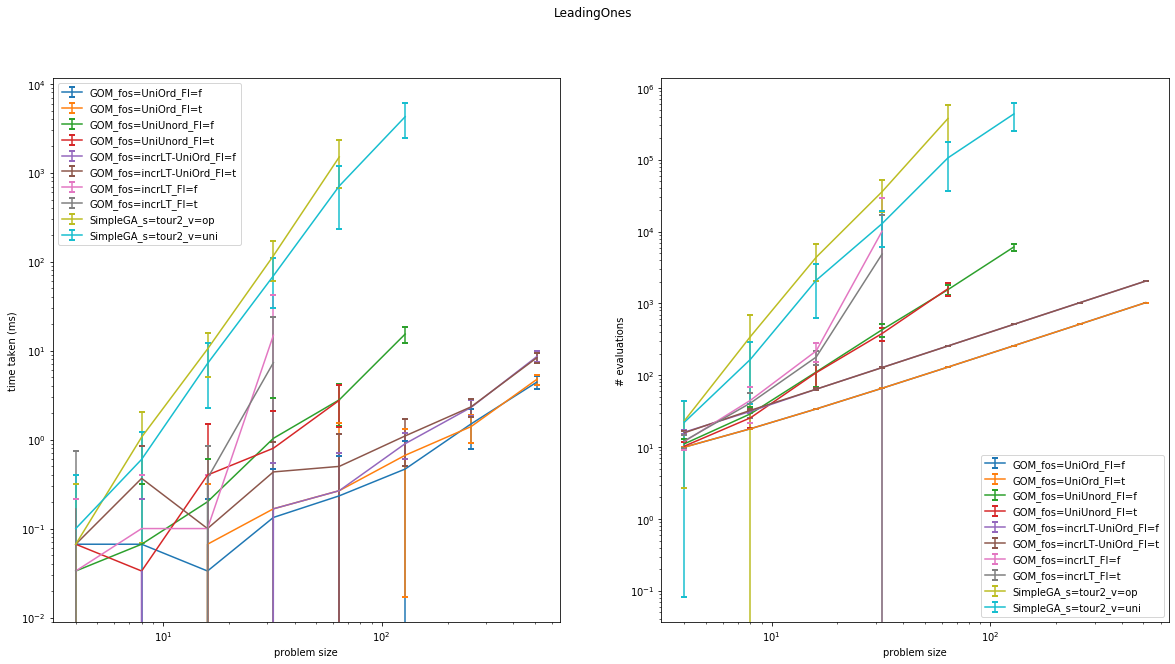

In [178]:
problem = 'LeadingOnes'

filename = "../data/exp3/data_all.json"

fig, (ax1, ax2) = plt.subplots(1, 2)

with open(filename) as json_file:
    data = json.load(json_file)
    
#     fig = plt.figure()
    fig.suptitle(str(problem))
    
    experiments = data['experiments']
        
    numExperiments = len(experiments);
#     print("Experiments =", numExperiments);
    
    for exp in experiments:
        data = experiments[exp]
        numEntries = len(data)
        
        avgTimes = np.zeros(numEntries)
        stdTimes = np.zeros(numEntries)
        avgEvaluations = np.zeros(numEntries)
        stdEvaluations = np.zeros(numEntries)
        problemSizes = np.zeros(numEntries)

        for i, problemsize in enumerate(sorted(map(int, data))):
#             print(problemsize)
            problemSizes[i] = problemsize

            repetitions = data[str(problemsize)]
            times = np.empty(len(repetitions))
            evaluations = np.empty(len(repetitions))
            for j, rep in enumerate(repetitions):
                times[j] = repetitions[rep]['timeTaken']
                evaluations[j] = repetitions[rep]['evaluations']

            avgTimes[i] = np.mean(times)
            stdTimes[i] = np.std(times)
            avgEvaluations[i] = np.mean(evaluations)
            stdEvaluations[i] = np.std(evaluations)

        ax1.errorbar(problemSizes, avgTimes, yerr=stdTimes, 
                     capsize=3, capthick=2, label=exp)
        ax2.errorbar(problemSizes, avgEvaluations, yerr=stdEvaluations,
                    capsize=3, capthick=2, label=exp)
    
    ax1.legend()
    ax2.legend()
    ax1.set_xlabel('problem size')
    ax2.set_xlabel('problem size')
    ax1.set_ylabel('time taken (ms)')
    ax2.set_ylabel('# evaluations')
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    
#     y = [10**x for x in range(6)]
#     x = [2**x for x in range(2,9)]
#     plt.yticks(y, y)
#     plt.xticks(x, x)
